In [2]:
# %load /Users/hwayment/ipynb_defaults.py
%load_ext autoreload
%autoreload 2

%pylab inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')

from matplotlib.colors import LogNorm

from glob import glob
import os, sys, pickle, requests


Populating the interactive namespace from numpy and matplotlib


In [8]:
df = pd.read_json('other_polyA_data_partial_df.json')

In [97]:
df_nluc = pd.read_json('EB_parsed_nowindow_moderna_data.json')

In [12]:
df.keys()

Index(['ID', 'info', 'reactivity', 'sequence'], dtype='object')

(-1154.4, 24242.4, 0.06976389704400002, 1.1255979782360002)

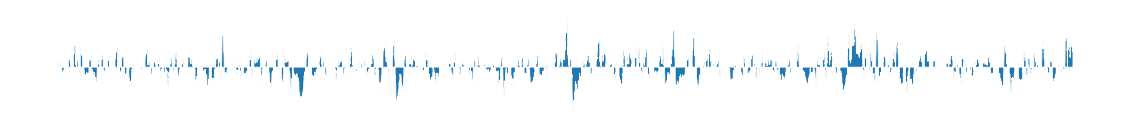

In [39]:
dat = df.loc[df['ID']=='kutchko_2018_alpha']['reactivity'].values[0]
dat = np.clip(dat,0,100)

N=len(dat)
M = 50

smoothed_dat = np.convolve(dat, np.ones((M,))/M, mode='valid')
figure(figsize=(20,2))
fill_between([x for x in range(len(smoothed_dat))],
             [np.median(smoothed_dat)]*len(smoothed_dat), smoothed_dat)
axis('off')

In [260]:
prob_dat = pd.read_json('../../data/full_df_window500_full_output_06Apr2020.json.zip')

In [58]:
len(prob_dat.loc[prob_dat['ID']=='kutchko_2018_alpha']['reactivity'])

49

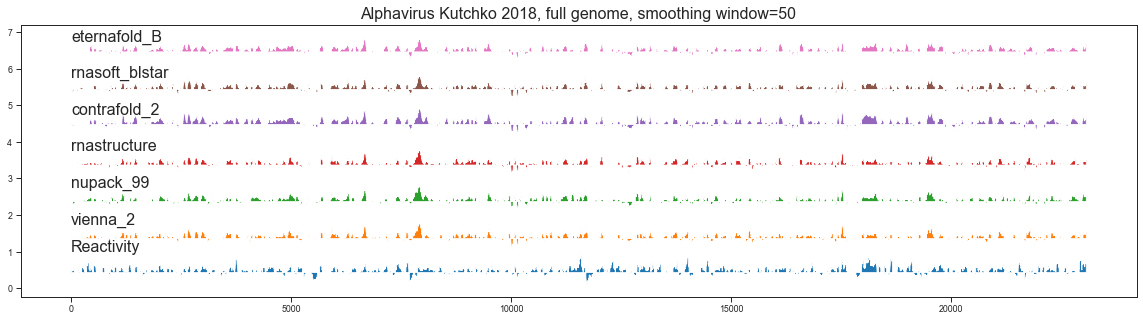

In [113]:
dat=[]
for i in range(49):
    tmp = prob_dat.loc[prob_dat['ID']=='kutchko_2018_alpha']['reactivity'].iloc[i]
    dat.extend(np.clip(tmp,0,100)[:-25])

N=len(dat)
M = 50


smoothed_dat = np.convolve(dat, np.ones((M,))/M, mode='valid')
smoothed_dat /= np.max(smoothed_dat)

figure(figsize=(20,5))
fill_between([x for x in range(len(smoothed_dat))],
             [np.percentile(smoothed_dat,25)]*len(smoothed_dat), smoothed_dat)

text(0,1,'Reactivity',fontsize=16)

for j, pkg in enumerate(['vienna_2', 'nupack_99','rnastructure',
                        'contrafold_2','rnasoft_blstar','eternafold_B']):
    dat=[]
    for i in range(49):
        
        tmp = prob_dat.loc[prob_dat['ID']=='kutchko_2018_alpha']['p_%s' % pkg].iloc[i]
        dat.extend(np.clip(tmp,0,100)[:-25])
        
    smoothed_dat = np.convolve(dat, np.ones((M,))/M, mode='valid')
    fill_between([x for x in range(len(smoothed_dat))],
                 [(j+1)+np.percentile(smoothed_dat,25)]*len(smoothed_dat), (j+1)+smoothed_dat)
    text(0,j+1.75,pkg,fontsize=16)
title('Alphavirus Kutchko 2018, full genome, smoothing window=50',fontsize=16)
savefig('alphavirus_kutchko_reac_profile_plot.pdf',bbox_inches='tight')

In [85]:
! open alphavirus_kutchko_reac_profile_plot.pdf

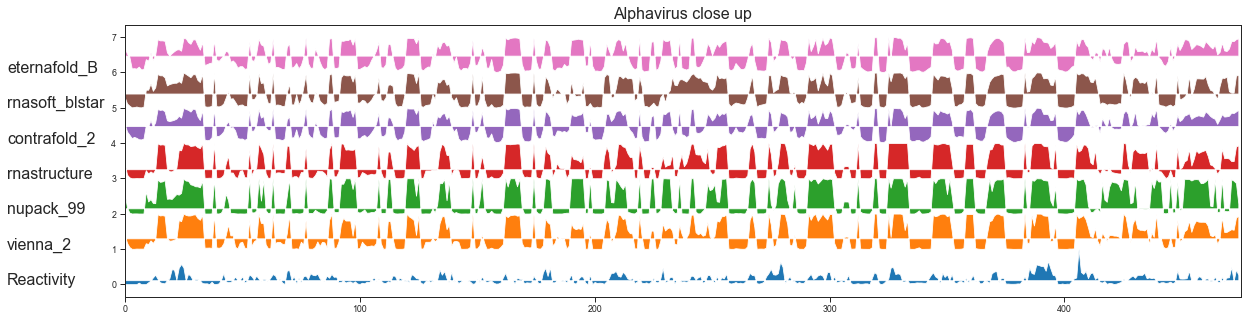

In [114]:
dat=[]
for i in range(1):
    tmp = prob_dat.loc[prob_dat['ID']=='kutchko_2018_alpha']['reactivity'].iloc[i]
    dat.extend(np.clip(tmp,0,100)[:-25])

N=len(dat)
M = 1


smoothed_dat = np.convolve(dat, np.ones((M,))/M, mode='valid')
smoothed_dat /= np.max(smoothed_dat)

figure(figsize=(20,5))
fill_between([x for x in range(len(smoothed_dat))],
             [np.median(smoothed_dat)]*len(smoothed_dat), smoothed_dat)

text(-50,0,'Reactivity',fontsize=16)

for j, pkg in enumerate(['vienna_2', 'nupack_99','rnastructure',
                        'contrafold_2','rnasoft_blstar','eternafold_B']):
    dat=[]
    for i in range(1):
        
        tmp = prob_dat.loc[prob_dat['ID']=='kutchko_2018_alpha']['p_%s' % pkg].iloc[i]
        dat.extend(np.clip(tmp,0,100)[:-25])
        
    smoothed_dat = np.convolve(dat, np.ones((M,))/M, mode='valid')
    fill_between([x for x in range(len(smoothed_dat))],
                 [(j+1)+np.median(smoothed_dat)]*len(smoothed_dat), (j+1)+smoothed_dat)
    text(-50,j+1,pkg,fontsize=16)
    
xlim([0,475])
title('Alphavirus close up', fontsize=16)
savefig('alphavirus_kutchko_reac_profile_plot_window1.pdf',bbox_inches='tight')

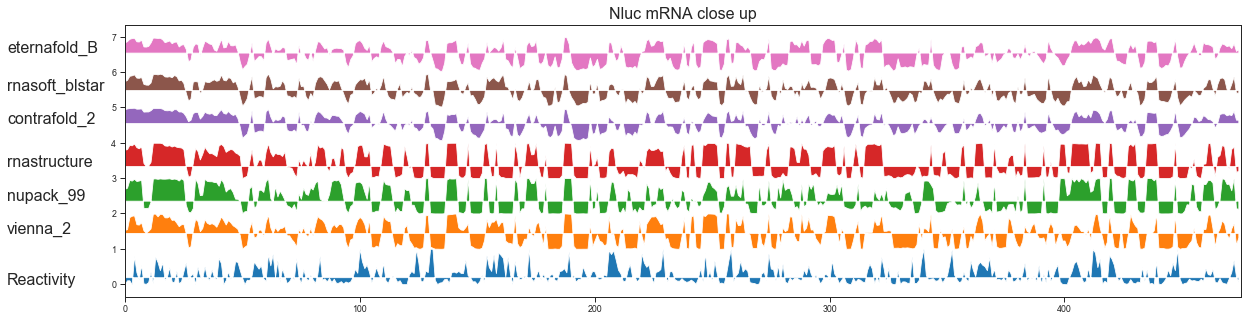

In [115]:
dat=[]
for i in range(1,2):
    tmp = prob_dat.loc[prob_dat['ID']=='U_L1']['reactivity'].iloc[i]
    dat.extend(np.clip(tmp,0,np.percentile(tmp,98))[:-25])

N=len(dat)
M = 1


smoothed_dat = np.convolve(dat, np.ones((M,))/M, mode='valid')
smoothed_dat /= np.max(smoothed_dat)

figure(figsize=(20,5))
fill_between([x for x in range(len(smoothed_dat))],
             [np.median(smoothed_dat)]*len(smoothed_dat), smoothed_dat)

text(-50,0,'Reactivity',fontsize=16)

for j, pkg in enumerate(['vienna_2', 'nupack_99','rnastructure',
                        'contrafold_2','rnasoft_blstar','eternafold_B']):
    dat=[]
    for i in range(1,2):
        
        tmp = prob_dat.loc[prob_dat['ID']=='U_L1']['p_%s' % pkg].iloc[i]
        dat.extend(np.clip(tmp,0,100)[:-25])
        
    smoothed_dat = np.convolve(dat, np.ones((M,))/M, mode='valid')
    fill_between([x for x in range(len(smoothed_dat))],
                 [(j+1)+np.median(smoothed_dat)]*len(smoothed_dat), (j+1)+smoothed_dat)
    text(-50,(j+1)+np.median(smoothed_dat),pkg,fontsize=16)
    
xlim([0,475])
title('Nluc mRNA close up',fontsize=16)
savefig('nluc_reac_profile_plot_window1.pdf',bbox_inches='tight')

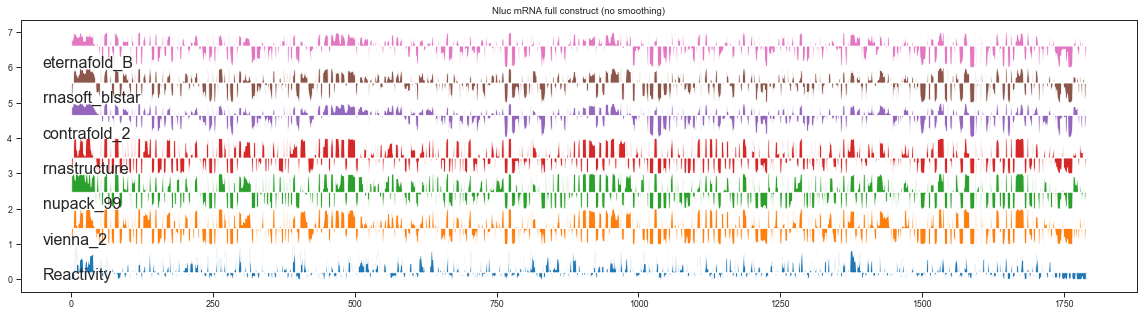

In [116]:
dat=[]
for i in range(4):
    tmp = prob_dat.loc[prob_dat['ID']=='U_L2']['reactivity'].iloc[i]
    dat.extend(np.clip(tmp,0,np.percentile(tmp,98))[:-25])

N=len(dat)
M = 1


smoothed_dat = np.convolve(dat, np.ones((M,))/M, mode='valid')
smoothed_dat /= np.max(smoothed_dat)

figure(figsize=(20,5))
fill_between([x for x in range(len(smoothed_dat))],
             [np.median(smoothed_dat)]*len(smoothed_dat), smoothed_dat)

text(-50,0,'Reactivity',fontsize=16)

for j, pkg in enumerate(['vienna_2', 'nupack_99','rnastructure',
                        'contrafold_2','rnasoft_blstar','eternafold_B']):
    dat=[]
    for i in range(4):
        
        tmp = prob_dat.loc[prob_dat['ID']=='U_L2']['p_%s' % pkg].iloc[i]
        dat.extend(np.clip(tmp,0,100)[:-25])
        
    smoothed_dat = np.convolve(dat, np.ones((M,))/M, mode='valid')
    fill_between([x for x in range(len(smoothed_dat))],
                 [(j+1)+np.median(smoothed_dat)]*len(smoothed_dat), (j+1)+smoothed_dat)
    text(-50,j+1,pkg,fontsize=16)
    
title('Nluc mRNA full construct (no smoothing)')
savefig('nluc_reac_profile_plot.pdf',bbox_inches='tight')

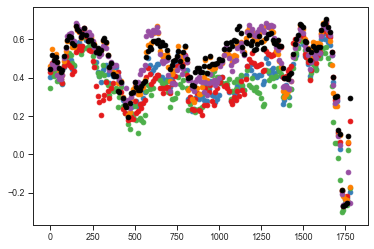

In [122]:
dat=[]

tmp_pal=sns.color_palette('Set1',5)
standardized_palette = [tmp_pal[x] for x in [1,2,0,4,3]] + [[0,0,0]]

for i in range(4):
    tmp = prob_dat.loc[prob_dat['ID']=='U_L2']['reactivity'].iloc[i]
    dat.extend(np.clip(tmp,0,np.percentile(tmp,98))[:-25])


for j, pkg in enumerate(['vienna_2', 'nupack_99','rnastructure',
                        'contrafold_2','rnasoft_blstar','eternafold_B']):
    p_dat=[]
    for i in range(4):
        
        tmp = prob_dat.loc[prob_dat['ID']=='U_L2']['p_%s' % pkg].iloc[i]
        p_dat.extend(np.clip(tmp,0,100)[:-25])
        
    for window_start in range(0,len(dat),10):
        window_end = np.min([window_start+100,len(dat)])
        scatter(window_start, np.corrcoef(dat[window_start:window_end],
                                          p_dat[window_start:window_end])[0][1],color=standardized_palette[j])

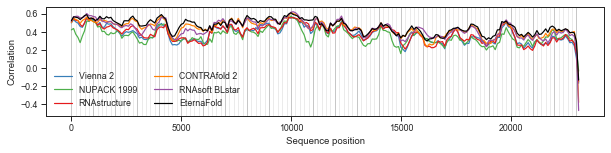

In [193]:
dat=[]

tmp_pal=sns.color_palette('Set1',5)
standardized_palette = [tmp_pal[x] for x in [1,2,0,4,3]] + [[0,0,0]]
figure(figsize=(10,2))
for i in range(49):
    tmp = prob_dat.loc[prob_dat['ID']=='kutchko_2018_alpha']['reactivity'].iloc[i]
    dat.extend(np.clip(tmp,0,np.percentile(tmp,98))[:-25])


for j, pkg in enumerate(['vienna_2', 'nupack_99','rnastructure',
                        'contrafold_2','rnasoft_blstar','eternafold_B']):
    p_dat=[]
    xs, ys=[],[]
    for i in range(49):
        
        tmp = prob_dat.loc[prob_dat['ID']=='kutchko_2018_alpha']['p_%s' % pkg].iloc[i]
        p_dat.extend(np.clip(tmp,0,100)[:-25])
        
    for window_start in range(0,len(dat),100):
        window_end = np.min([window_start+500,len(dat)])
        xs.append(window_start)
        ys.append(np.corrcoef(dat[window_start:window_end],
                                          p_dat[window_start:window_end])[0][1])

    plot(xs,ys,c=standardized_palette[j],label=pkg)
    
for x in range(0,len(dat),200):
    axvline(x,zorder=0,color='grey',linewidth=0.5,alpha=0.3)
    
for x in range(0,len(dat),1000):
    axvline(x,zorder=0,color='k',linewidth=0.5,alpha=0.3)
    
xlabel('Sequence position')
ylabel('Correlation')
titles = ['Vienna 2', 'NUPACK 1999', 'RNAstructure', 'CONTRAfold 2', 'RNAsoft BLstar', 'EternaFold']
legend(titles, loc='lower left', ncol=2, frameon=False)

savefig('Alphavirus_correlation_along_length.pdf',bbox_inches='tight',transparent=True)


In [192]:
! open Alphavirus_correlation_along_length.pdf

In [261]:
arr=[np.zeros(100)]

arr.append(dat[10000:10100])

arr.append(np.zeros(100))
for j, pkg in enumerate(['vienna_2', 'nupack_99','rnastructure',
                        'contrafold_2','rnasoft_blstar','eternafold_B']):
    p_dat=[]
    xs, ys=[],[]
    for i in range(49):
        
        tmp = prob_dat.loc[prob_dat['ID']=='kutchko_2018_alpha']['p_%s' % pkg].iloc[i]
        p_dat.extend(np.clip(tmp,0,100)[:-25])
        
    arr.append(p_dat[10000:10100])
    
arr.append(np.zeros(100))

arr = np.vstack(arr)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 100 and the array at index 1 has size 0

(-0.5, 99.5, 9.5, -0.5)

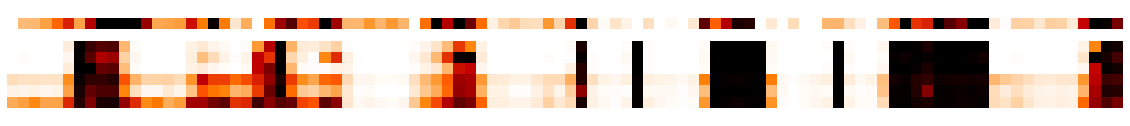

In [176]:
figure(figsize=(20,4))
imshow(arr,cmap='gist_heat_r',vmin=0,vmax=1)
axis('off')

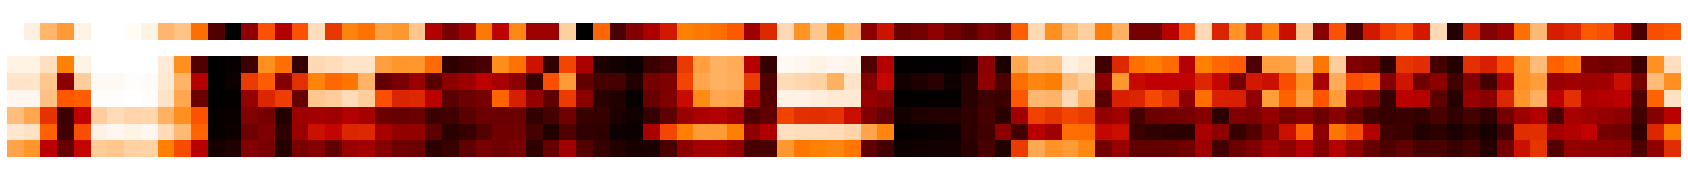

In [267]:
start_ind=6000
length=100

arr=[]
r = dat[start_ind:start_ind+length]/np.max(dat[start_ind:start_ind+length])

arr.append(np.zeros(length))

arr.append(r)
arr.append(np.zeros(length))

for j, pkg in enumerate(['vienna_2', 'nupack_99','rnastructure',
                        'contrafold_2','rnasoft_blstar','eternafold_B']):
    p_dat=[]
    xs, ys=[],[]
    for i in range(len(prob_dat.loc[prob_dat['ID']=='watts_2009_hiv_CE'])):
        
        tmp = prob_dat.loc[prob_dat['ID']=='watts_2009_hiv_CE']['p_%s' % pkg].iloc[i]
        p_dat.extend(np.clip(tmp,0,100)[:-25])


    arr.append(p_dat[start_ind:start_ind+length])
    
arr.append(np.zeros(length))

arr = np.vstack(arr)
figure(figsize=(30,4))
imshow(arr,cmap='gist_heat_r',vmin=0,vmax=1)
axis('off')
savefig('heatplot_C.pdf')

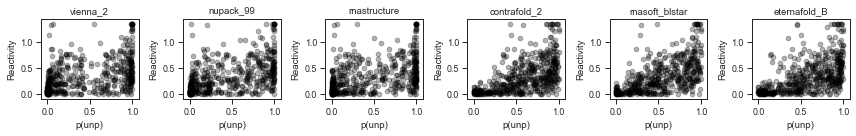

In [284]:
start_ind=1400
length=500

arr=[]
r = dat[start_ind:start_ind+length]

arr.append(np.zeros(length))

arr.append(r)
arr.append(np.zeros(length))

figure(figsize=(12,2))
for j, pkg in enumerate(['vienna_2', 'nupack_99','rnastructure',
                        'contrafold_2','rnasoft_blstar','eternafold_B']):
    p_dat=[]
    xs, ys=[],[]
    for i in range(len(prob_dat.loc[prob_dat['ID']=='watts_2009_hiv_CE'])):
        
        tmp = prob_dat.loc[prob_dat['ID']=='watts_2009_hiv_CE']['p_%s' % pkg].iloc[i]
        p_dat.extend(np.clip(tmp,0,100)[:-25])


    subplot(1,6,j+1)
    scatter(p_dat[start_ind:start_ind+length],r,alpha=0.3,color='k')
    ylabel('Reactivity')
    xlabel('p(unp)')
    title(pkg)
tight_layout()

In [268]:
! open heatplot_*.pdf

Text(0.5, 1.0, 'Watts, HIV-1, 2009')

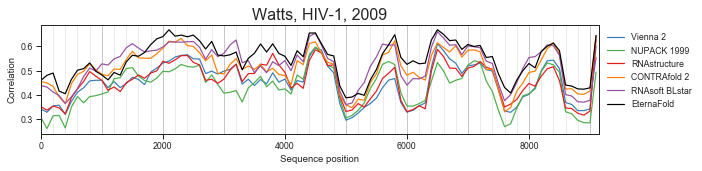

In [256]:
dat=[]

identifier='watts_2009_hiv_CE'

n_windows = len(prob_dat.loc[prob_dat['ID']==identifier])
tmp_pal=sns.color_palette('Set1',5)
standardized_palette = [tmp_pal[x] for x in [1,2,0,4,3]] + [[0,0,0]]

figure(figsize=(10,2))
for i in range(n_windows):
    tmp = prob_dat.loc[prob_dat['ID']==identifier]['reactivity'].iloc[i]
    dat.extend(np.clip(tmp,0,np.percentile(tmp,98))[:-25])


for j, pkg in enumerate(['vienna_2', 'nupack_99','rnastructure',
                        'contrafold_2','rnasoft_blstar','eternafold_B']):
    p_dat=[]
    xs, ys=[],[]
    for i in range(n_windows):
        
        tmp = prob_dat.loc[prob_dat['ID']==identifier]['p_%s' % pkg].iloc[i]
        p_dat.extend(np.clip(tmp,0,100)[:-25])
        
    for window_start in range(0,len(dat),100):
        window_end = np.min([window_start+500,len(dat)])
        xs.append(window_start)
        ys.append(np.corrcoef(dat[window_start:window_end],
                                          p_dat[window_start:window_end])[0][1])

    plot(xs,ys,c=standardized_palette[j],label=pkg)
    
for x in range(0,len(dat),200):
    axvline(x,zorder=0,color='grey',linewidth=0.5,alpha=0.3)
    
for x in range(0,len(dat),1000):
    axvline(x,zorder=0,color='k',linewidth=0.5,alpha=0.3)
    
xlabel('Sequence position')
ylabel('Correlation')
xlim([0,len(dat)])
titles = ['Vienna 2', 'NUPACK 1999', 'RNAstructure', 'CONTRAfold 2', 'RNAsoft BLstar', 'EternaFold']
legend(titles, ncol=1, frameon=False, bbox_to_anchor=(1,1))
title('Watts, HIV-1, 2009',fontsize=16)
#savefig('Watts_HIV1_correlation_along_length.pdf',bbox_inches='tight',transparent=True)


In [216]:
! open Watts_HIV1_correlation_along_length.pdf

Text(0.5, 1.0, 'Dadaoniate, IAV, 2019')

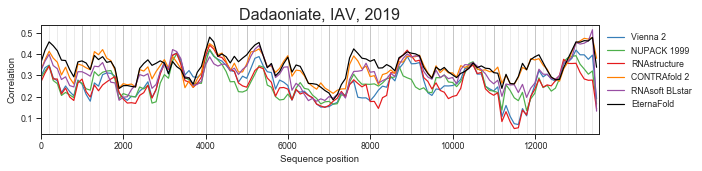

In [213]:
dat=[]

identifier='dadonaite_2019_influenza'

n_windows = len(prob_dat.loc[prob_dat['ID']==identifier])
tmp_pal=sns.color_palette('Set1',5)
standardized_palette = [tmp_pal[x] for x in [1,2,0,4,3]] + [[0,0,0]]

figure(figsize=(10,2))
for i in range(n_windows):
    tmp = prob_dat.loc[prob_dat['ID']==identifier]['reactivity'].iloc[i]
    dat.extend(np.clip(tmp,0,np.percentile(tmp,98))[:-25])


for j, pkg in enumerate(['vienna_2', 'nupack_99','rnastructure',
                        'contrafold_2','rnasoft_blstar','eternafold_B']):
    p_dat=[]
    xs, ys=[],[]
    for i in range(n_windows):
        
        tmp = prob_dat.loc[prob_dat['ID']==identifier]['p_%s' % pkg].iloc[i]
        p_dat.extend(np.clip(tmp,0,100)[:-25])
        
    for window_start in range(0,len(dat),100):
        window_end = np.min([window_start+500,len(dat)])
        xs.append(window_start)
        ys.append(np.corrcoef(dat[window_start:window_end],
                                          p_dat[window_start:window_end])[0][1])

    plot(xs,ys,c=standardized_palette[j],label=pkg)
    
for x in range(0,len(dat),200):
    axvline(x,zorder=0,color='grey',linewidth=0.5,alpha=0.3)
    
for x in range(0,len(dat),1000):
    axvline(x,zorder=0,color='k',linewidth=0.5,alpha=0.3)
    
xlabel('Sequence position')
ylabel('Correlation')
xlim([0,len(dat)])
titles = ['Vienna 2', 'NUPACK 1999', 'RNAstructure', 'CONTRAfold 2', 'RNAsoft BLstar', 'EternaFold']
legend(titles, ncol=1, frameon=False, bbox_to_anchor=(1,1))
title('Dadaoniate, IAV, 2019',fontsize=16)
#savefig('Alphavirus_correlation_along_length.pdf',bbox_inches='tight',transparent=True)


In [ ]:
dat=[]

identifier='dadonaite_2019_influenza'

n_windows = len(prob_dat.loc[prob_dat['ID']==identifier])
tmp_pal=sns.color_palette('Set1',5)
standardized_palette = [tmp_pal[x] for x in [1,2,0,4,3]] + [[0,0,0]]

figure(figsize=(10,2))
for i in range(n_windows):
    tmp = prob_dat.loc[prob_dat['ID']==identifier]['reactivity'].iloc[i]
    dat.extend(np.clip(tmp,0,np.percentile(tmp,98))[:-25])


for j, pkg in enumerate(['vienna_2', 'nupack_99','rnastructure',
                        'contrafold_2','rnasoft_blstar','eternafold_B']):
    p_dat=[]
    xs, ys=[],[]
    for i in range(n_windows):
        
        tmp = prob_dat.loc[prob_dat['ID']==identifier]['p_%s' % pkg].iloc[i]
        p_dat.extend(np.clip(tmp,0,100)[:-25])
        
    for window_start in range(0,len(dat),100):
        window_end = np.min([window_start+500,len(dat)])
        xs.append(window_start)
        ys.append(np.corrcoef(dat[window_start:window_end],
                                          p_dat[window_start:window_end])[0][1])

    plot(xs,ys,c=standardized_palette[j],label=pkg)
    
for x in range(0,len(dat),200):
    axvline(x,zorder=0,color='grey',linewidth=0.5,alpha=0.3)
    
for x in range(0,len(dat),1000):
    axvline(x,zorder=0,color='k',linewidth=0.5,alpha=0.3)
    
xlabel('Sequence position')
ylabel('Correlation')
titles = ['Vienna 2', 'NUPACK 1999', 'RNAstructure', 'CONTRAfold 2', 'RNAsoft BLstar', 'EternaFold']
legend(titles, ncol=1, frameon=False, bbox_to_anchor=(1,1))
title('Dadaoniate, IAV, 2019',fontsize=16)
#savefig('Alphavirus_correlation_along_length.pdf',bbox_inches='tight',transparent=True)


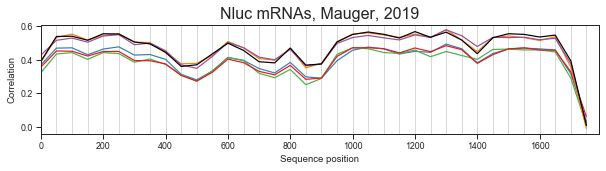

In [251]:
dat=[]

identifiers=['U_L7', 'U_L6', 'U_L4', 'U_L5', 'U_L1', 'U_L2', 'U_L3', 'U_L13', 'U_L12', 'U_L38', 'U_L10', 'U_L11',
 'U_L39', 'U_L15', 'U_L29', 'U_L28', 'U_L14', 'U_L16', 'U_L17', 'U_L32', 'U_L26', 'U_L27', 'U_L33',
 'U_L19', 'U_L25', 'U_L31', 'U_L30', 'U_L24', 'U_L18', 'U_L20', 'U_L34', 'U_L35', 'U_L21', 'U_L37',
 'U_L23', 'U_L22', 'U_L36', 'U_L8', 'U_L9']

n_windows = 4
tmp_pal=sns.color_palette('Set1',5)
standardized_palette = [tmp_pal[x] for x in [1,2,0,4,3]] + [[0,0,0]]

figure(figsize=(10,2))
packages=['vienna_2', 'nupack_99','rnastructure',
                            'contrafold_2','rnasoft_blstar','eternafold_B']
all_data = {k:[] for k in packages}
for identifier in identifiers:
    dat = []
    for i in range(n_windows):
        tmp = prob_dat.loc[prob_dat['ID']==identifier]['reactivity'].iloc[i]
        dat.extend(np.clip(tmp,0,np.percentile(tmp,98))[:-25])


    for j, pkg in enumerate(packages):
        p_dat=[]
        xs, ys=[],[]
        for i in range(n_windows):

            tmp = prob_dat.loc[prob_dat['ID']==identifier]['p_%s' % pkg].iloc[i]
            p_dat.extend(np.clip(tmp,0,100)[:-25])

        for window_start in range(0,len(dat),50):
            window_end = np.min([window_start+100,len(dat)])
            xs.append(window_start)
            ys.append(np.corrcoef(dat[window_start:window_end],
                                              p_dat[window_start:window_end])[0][1])

        #plot(xs,ys,c=standardized_palette[j],label=pkg)
        all_data[pkg].append(ys)
        
for x in range(0,len(dat),50):
    axvline(x,zorder=0,color='k',linewidth=0.5,alpha=0.3)
    
for j,pkg in enumerate(packages):
    plot(xs,np.mean(np.array(all_data[pkg]),axis=0),color=standardized_palette[j],label=pkg)

# for x in range(0,len(dat),200):
#     axvline(x,zorder=0,color='grey',linewidth=0.5,alpha=0.3)

xlabel('Sequence position')
ylabel('Correlation')
titles = ['Vienna 2', 'NUPACK 1999', 'RNAstructure', 'CONTRAfold 2', 'RNAsoft BLstar', 'EternaFold']
#legend(titles, ncol=1, frameon=False, bbox_to_anchor=(1,1))
xlim([0,len(dat)])
title('Nluc mRNAs, Mauger, 2019',fontsize=16)
savefig('nluc_correlation_along_length.pdf',bbox_inches='tight',transparent=True)


In [242]:
! open nluc_correlation_along_length.pdf

Text(0.5, 1.0, 'Nluc mRNAs, Mauger, 2019')

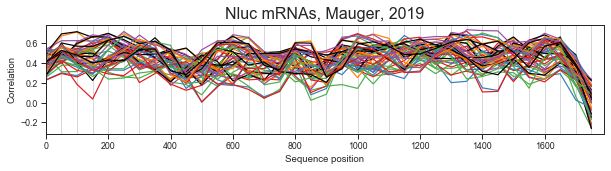

In [250]:
dat=[]

identifiers=['U_L7', 'U_L6', 'U_L4', 'U_L5', 'U_L1', 'U_L2', 'U_L3', 'U_L13', 'U_L12', 'U_L38', 'U_L10', 'U_L11',
 'U_L39', 'U_L15', 'U_L29', 'U_L28', 'U_L14', 'U_L16', 'U_L17', 'U_L32', 'U_L26', 'U_L27', 'U_L33',
 'U_L19', 'U_L25', 'U_L31', 'U_L30', 'U_L24', 'U_L18', 'U_L20', 'U_L34', 'U_L35', 'U_L21', 'U_L37',
 'U_L23', 'U_L22', 'U_L36', 'U_L8', 'U_L9']

n_windows = 4
tmp_pal=sns.color_palette('Set1',5)
standardized_palette = [tmp_pal[x] for x in [1,2,0,4,3]] + [[0,0,0]]

figure(figsize=(10,2))
packages=['vienna_2', 'nupack_99','rnastructure',
                            'contrafold_2','rnasoft_blstar','eternafold_B']
all_data = {k:[] for k in packages}
for identifier in identifiers[::5]:
    dat = []
    for i in range(n_windows):
        tmp = prob_dat.loc[prob_dat['ID']==identifier]['reactivity'].iloc[i]
        dat.extend(np.clip(tmp,0,np.percentile(tmp,98))[:-25])


    for j, pkg in enumerate(packages):
        p_dat=[]
        xs, ys=[],[]
        for i in range(n_windows):

            tmp = prob_dat.loc[prob_dat['ID']==identifier]['p_%s' % pkg].iloc[i]
            p_dat.extend(np.clip(tmp,0,100)[:-25])

        for window_start in range(0,len(dat),50):
            window_end = np.min([window_start+100,len(dat)])
            xs.append(window_start)
            ys.append(np.corrcoef(dat[window_start:window_end],
                                              p_dat[window_start:window_end])[0][1])

        plot(xs,ys,c=standardized_palette[j],label=pkg)
        all_data[pkg].append(ys)
        
for x in range(0,len(dat),50):
    axvline(x,zorder=0,color='k',linewidth=0.5,alpha=0.3)
    
# for j,pkg in enumerate(packages):
#     errorbar(xs,np.mean(np.array(all_data[pkg]),axis=0),np.std(np.array(all_data[pkg]),axis=0),color=standardized_palette[j],label=pkg)
    
# for x in range(0,len(dat),200):
#     axvline(x,zorder=0,color='grey',linewidth=0.5,alpha=0.3)

xlabel('Sequence position')
ylabel('Correlation')
titles = ['Vienna 2', 'NUPACK 1999', 'RNAstructure', 'CONTRAfold 2', 'RNAsoft BLstar', 'EternaFold']
#legend(titles, ncol=1, frameon=False, bbox_to_anchor=(1,1))
xlim([0,len(dat)])
title('Nluc mRNAs, Mauger, 2019',fontsize=16)
#savefig('nluc_correlation_along_length.pdf',bbox_inches='tight',transparent=True)


In [ ]:
['U_L7', 'U_L6', 'U_L4', 'U_L5', 'U_L1', 'U_L2', 'U_L3', 'U_L13', 'U_L12', 'U_L38', 'U_L10', 'U_L11',
 'U_L39', 'U_L15', 'U_L29', 'U_L28', 'U_L14', 'U_L16', 'U_L17', 'U_L32', 'U_L26', 'U_L27', 'U_L33',
 'U_L19', 'U_L25', 'U_L31', 'U_L30', 'U_L24', 'U_L18', 'U_L20', 'U_L34', 'U_L35', 'U_L21', 'U_L37',
 'U_L23', 'U_L22', 'U_L36', 'U_L8', 'U_L9']

In [252]:
tmp = pd.read_json('../../data/inputs/other_polyA_data_partial_df.json')

In [254]:
tmp.to_excel('tmp.xlsx')

In [255]:
! open tmp.xlsx